In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 首先是初始化一堆奇怪的变量

In [2]:
x, y = None, None
sx, sy = None, None
pre_y = None
positions = 3
dp = [[0 for i in range(positions)] for j in range(positions)]

def f(x):
    return np.log2(x)

### 然后是初始化一堆奇怪的图象

In [3]:
#可以显示中文
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False

# 设置风格
plt.style.use('ggplot')

fig = plt.figure(figsize = (8, 12))

def draw_pre():
    plt.subplot(2,1,2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('牛顿插值图像')
    plt.scatter(x,y,c='red')
    plt.plot(sx,pre_y,c='black')
    plt.plot(sx,sy)
    plt.legend(['预测','真实'])
    plt.show()

<Figure size 576x864 with 0 Axes>

### 再然后是生成一堆奇怪的数据并绘制函数图像

([6.840000000000005, 7.000000000000005, 7.700000000000006],
 [2.7739963251111743, 2.807354922057605, 2.94485844580754])

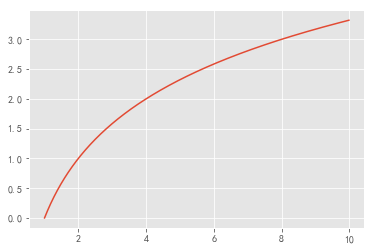

In [4]:
def generate_data(start,end,select_num):
    x = np.arange(start,end,0.01)
    y = f(x)
    plt.plot(x.reshape(-1), y)
    select_num = np.random.choice(np.arange(len(x)),[select_num])
    select_num.sort()
    return x.reshape(-1), y, [x[i] for i in select_num], [y[i] for i in select_num]

x, y, sx, sy = generate_data(1, 10, positions)
# 获取拟合点
sx, sy

### 后来我们需要算系数咯

In [5]:
def dp_cof():
    cnt = 1
    for i in range(positions):
        dp[0][i] = f(sx[i])
        
    while cnt < positions:
        for i in range(positions - cnt):
            dp[cnt][i] = (dp[cnt - 1][i + 1] - dp[cnt - 1][i]) / (sx[i + cnt] - sx[i])
        cnt += 1
    pass

dp_cof()
dp

[[2.7739963251111743, 2.807354922057605, 2.94485844580754],
 [0.20849123091519187, 0.1964336053570499, 0],
 [-0.014020494835048778, 0, 0]]

### 此时最上面的一排就是系数

In [6]:
b = [dp[i][0] for i in range(positions)]
b

[2.7739963251111743, 0.20849123091519187, -0.014020494835048778]

In [7]:
def pre(x):
    return b[0] + (x - sx[0]) * b[1] + (x - sx[0]) * (x - sx[0]) * b[2] 

In [8]:
pre_y = pre(sx)

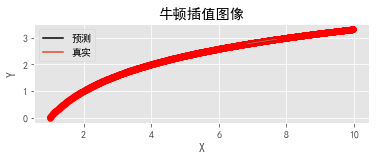

In [9]:
draw_pre()